In [130]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import os
import pandas as pd


# load data 
def load_file(dataset):
        if dataset == 'HCP-Task':
                router_logits = torch.load('../log/router_logits_brain.pt')
        elif dataset == 'HCP-Gender':
                router_logits = torch.load('../log/router_logits_HCPGender.pt')
        elif dataset == 'HCP-Age':
                router_logits = torch.load('../log/router_logits_HCPAge.pt')
        elif dataset == 'HCP-WM':
                router_logits = torch.load('../log/router_logits_HCPWM.pt')
        elif dataset == 'HCP-FI':
                router_logits = torch.load('../log/router_logits_HCPFI.pt')
        return router_logits

# aggregate the data
def transform(data):
        data = torch.softmax(data, dim=1)
        data = torch.split(data, data.shape[0] // 3, dim=0)
        data = list(data)
        for i in range(len(data)):
                data[i] = torch.mean(data[i], dim=0)
        data = torch.stack(data)
        return data
        

# the data size should be 3 * 3 
data = {'HCP-Task': None, 'HCP-Gender': None, 'HCP-FI': None, 'HCP-WM': None}
data_name = list(data.keys())
for key, value in data.items():
        if key == 'Age':
                print((load_file(key)))
        each_act = transform(load_file(key))
        data[key] = each_act



In [131]:
data

{'HCP-Task': tensor([[0.0000, 0.4375, 0.5625],
         [0.0000, 0.0000, 1.0000],
         [1.0000, 0.0000, 0.0000]]),
 'HCP-Gender': tensor([[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
         [0.8182, 0.1818, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000]]),
 'HCP-FI': tensor([[0.2612, 0.4667, 0.2720],
         [0.3648, 0.3237, 0.3114],
         [0.3564, 0.3345, 0.3091]]),
 'HCP-WM': tensor([[3.2120e-06, 1.0000e+00, 8.9503e-07],
         [1.0000e+00, 2.8490e-07, 1.5132e-10],
         [2.7027e-07, 9.4659e-01, 5.3410e-02]])}

In [101]:
data['HCP-Task'] = torch.tensor([[0.3125, 0.2813, 0.4062],
         [0.1249, 0.4520, 0.4231],
         [1.0000, 0.0000, 0.0000]])

# data['Age'] = torch.tensor([[0.2403, 0.3295, 0.4302],
#          [0.2362, 0.4000, 0.3638],
#          [0.3825, 0.3491, 0.2685]])

data['HCP-Gender'] = torch.tensor([[0.1250, 0.1250, 0.7500],
         [0.0000, 1.0000, 0.0000],
         [0.8750, 0.0000, 0.1250]])

data['HCP-FI'] = torch.tensor([[0.3144, 0.0109, 0.6747],
         [0.3576, 0.3179, 0.3246],
         [0.3495, 0.3320, 0.3185]])

data['HCP-WM'] = torch.tensor([[0.9844, 0.0000, 0.0156],
         [0.0000, 0.0625, 0.9375],
         [0.7656, 0.1406, 0.0938]])

In [123]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold) +0.2
    else:
        threshold = im.norm(data.max())/2 + 0.2

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts





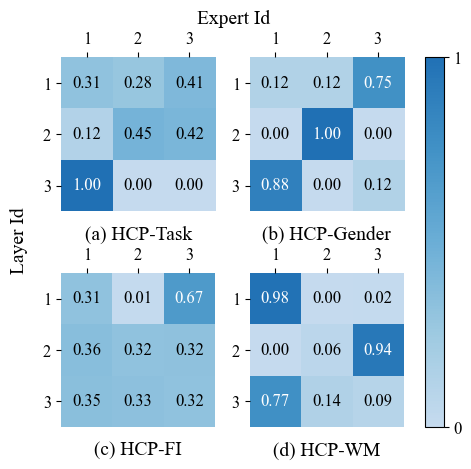

In [124]:
# import sns

# 设置字体和大小
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'stix'  # Options: 'stix', 'stixsans', 'cm' (Computer Modern), 'dejavusans'
plt.rcParams['mathtext.default'] = 'regular'  # Use regular weight for math fonts

# data loading 1. group 2. acc+ delta_sp .loc rank 3.average of three files 



fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(right=0.8, wspace=0.2, hspace=0.4)

label_id = ['(a)', '(b)', '(c)', '(d)']
for i in range(2):
        for j in range(2):
                ax = axes[i][j]
                data_now = data[data_name[i*2 + j]]
                im = ax.imshow(data_now, vmax=1.5, vmin=-0.5, cmap="Blues")
                texts = annotate_heatmap(im, valfmt="{x:.2f}")
                ax.set_xticks(np.arange(len(data_now)), labels=[1,2,3])
                # Move x-axis ticks to the top
                ax.xaxis.tick_top()
                # ax.xaxis.set_label_position('top') 
                
                # Optionally remove bottom and right ticks
                ax.tick_params(bottom=False, right=False)
                ax.set_yticks(np.arange(len(data_now)), labels=[1,2,3])
                ax.set_xlabel(label_id[i*2 + j] + ' ' + data_name[i*2 + j], fontsize=14, labelpad=10)

                for spine in ax.spines.values():
                        spine.set_visible(False)


fig.suptitle('Expert Id', fontsize=14, x=0.4,y=0.98)
fig.text(0.05, 0.5, 'Layer Id', va='center', rotation='vertical', fontsize=14)

# plt.tight_layout()
cbar = ax.figure.colorbar(im, ax=axes, format="{x:.0f}")
cbar.set_ticks([0,1])
cbar.ax.set_ylim([0,1])


# plt.legend()



# 移除上方和右侧的边框
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


# plt.legend(fontsize=13, borderpad=0.3, labelspacing=0.1, ncol=4, columnspacing=1.33, handletextpad=0.3, loc=(0.02, 0.8))
        #    , handlelength=1, handleheight=0.5)
plt.savefig('activation.pdf', dpi=600, format= 'pdf', bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()